In [116]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot as plt

In [117]:
%matplotlib inline

In [118]:
import geopandas as gpd
import shapely

In [119]:
df = pd.read_csv('earthquakes.csv')

In [120]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-01-01 23:59:10,37.085500,-98.040667,6.36,1.56,ml,12.0,137.00,0.05775,0.0400,...,2017-03-02 15:40:54,"7km S of Anthony, Kansas",earthquake,0.19,0.61,0.128,13.0,reviewed,ismp,ismp
1,2017-01-01 23:50:58,62.798800,-149.467300,6.00,0.90,ml,NaN,NaN,NaN,0.6300,...,2017-01-06 02:34:10,"62km NNE of Talkeetna, Alaska",earthquake,NaN,0.40,NaN,NaN,reviewed,ak,ak
2,2017-01-01 23:50:39,32.966833,-115.562833,9.88,2.56,ml,47.0,75.00,0.06521,0.2400,...,2017-02-08 19:29:28,"3km WSW of Brawley, CA",earthquake,0.21,0.52,0.236,24.0,reviewed,ci,ci
3,2017-01-01 23:50:07,38.428400,-118.889200,5.50,1.20,ml,6.0,210.16,0.07200,0.0885,...,2017-03-14 05:05:00,"25km WSW of Hawthorne, Nevada",earthquake,NaN,7.90,0.250,2.0,reviewed,nn,nn
4,2017-01-01 23:47:17,38.428400,-118.901300,6.70,1.90,ml,13.0,70.02,0.07200,0.1497,...,2017-03-14 05:05:02,"26km WSW of Hawthorne, Nevada",earthquake,NaN,1.90,0.250,8.0,reviewed,nn,nn


# 1. GIS EDA

In [121]:
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[shapely.geometry.Point(xy) for xy in zip(df.longitude, df.latitude)])


(-197.99999999999997,
 198.00000000000014,
 -98.68225650000004,
 92.32738650000003)

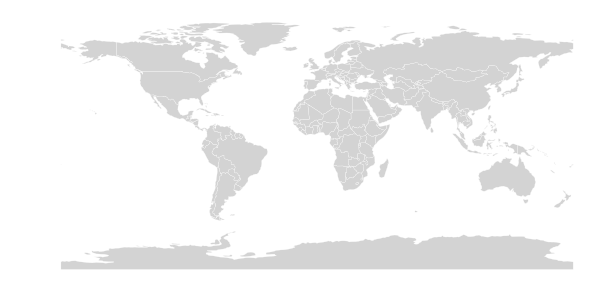

In [122]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgrey')
ax.axis('off')

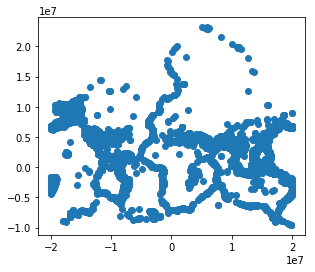

In [123]:
gdf.to_crs({'proj': 'merc'}).plot()

(-197.99647347017302,
 197.99817347017301,
 -72.59844901660445,
 94.60224901660446)

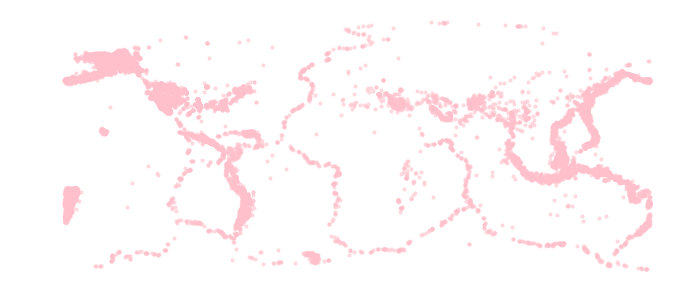

In [124]:
ax = gdf.plot(figsize=(20,5), markersize=10, color='pink', alpha=0.5)
ax.axis('off')

(-199.21718887716926,
 199.21888887716938,
 -98.90537790350773,
 97.01293597366153)

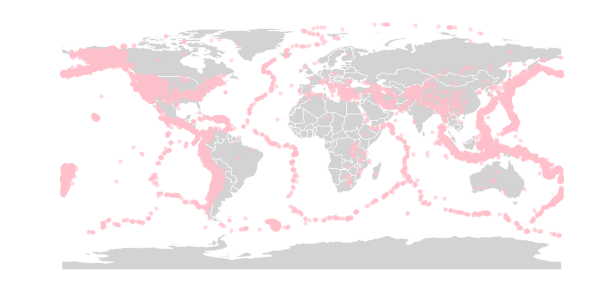

In [125]:
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
gdf.plot(markersize=10, color='pink', alpha=0.5, ax=ax)
ax.axis('off')

In [126]:
import fiona

In [127]:
with fiona.Collection('./World_EEZ_v10_20180221/eez_v10.shp') as f:
    water_df = gpd.GeoDataFrame.from_features(f, crs=f.crs)

(-199.21718887716926,
 199.21888887716938,
 -98.90537790350773,
 97.01293597366153)

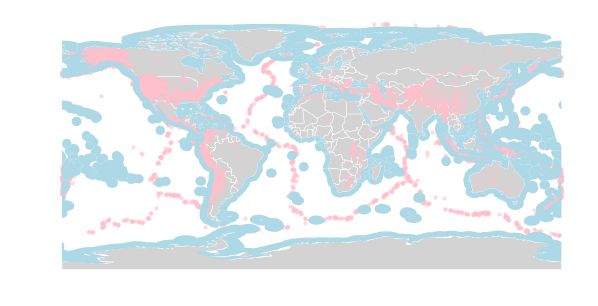

In [128]:
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
gdf.plot(markersize=10, color='pink', alpha=0.5, ax=ax)
water_df.plot(color='lightblue', ax=ax)
ax.axis('off')

## Let's add countries dataframe

In [129]:
countries_df = gpd.read_file('./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp')

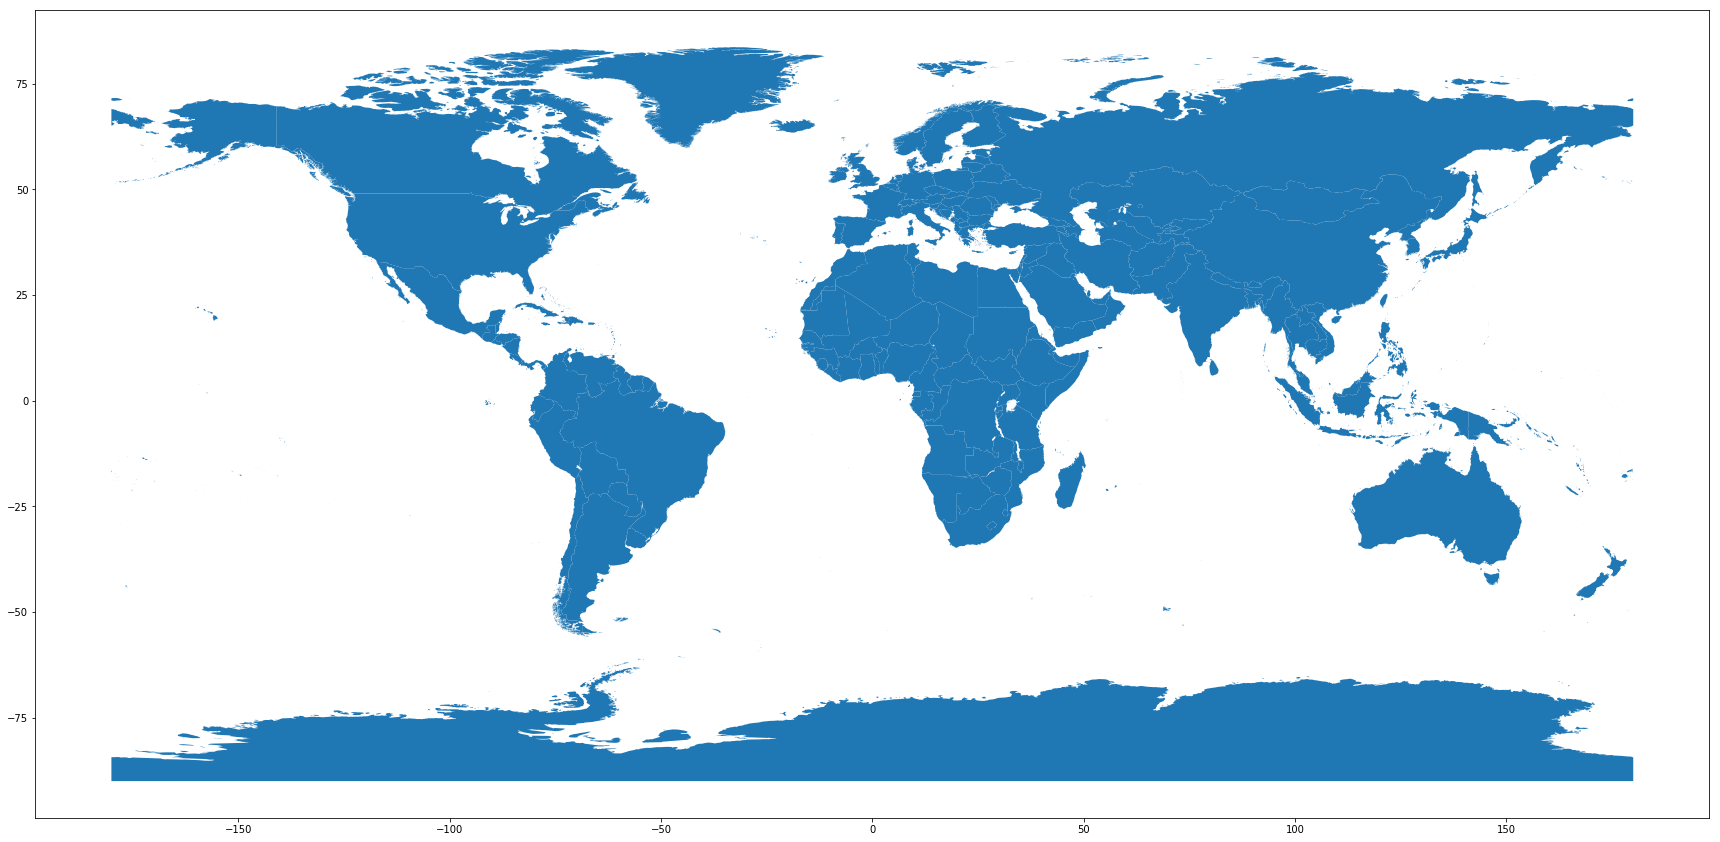

In [130]:
countries_df.plot(figsize=(30, 15))

In [131]:
countries_df.head(100)

,scalerank,featurecla,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,geometry
0,3,Admin-0 country,5.0,Netherlands,NL1,1.0,2.0,Country,Aruba,ABW,...,Latin America & Caribbean,5.0,5.0,5.0,4.0,-99.0,0.0,5.0,10.0,"POLYGON ((-69.87682044199994 12.4273949240001,..."
1,0,Admin-0 country,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,AFG,...,South Asia,11.0,11.0,4.0,-99.0,1.0,0.0,3.0,7.0,"POLYGON ((74.89230676300019 37.23111358700004,..."
2,0,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,AGO,...,Sub-Saharan Africa,6.0,6.0,4.0,-99.0,1.0,0.0,3.0,7.0,(POLYGON ((11.73751945100014 -16.6925779829997...
3,3,Admin-0 country,6.0,United Kingdom,GB1,1.0,2.0,Dependency,Anguilla,AIA,...,Latin America & Caribbean,8.0,8.0,4.0,-99.0,-99.0,0.0,5.0,10.0,(POLYGON ((-63.03766842399997 18.2129580750000...
4,0,Admin-0 country,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,ALB,...,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,0.0,5.0,10.0,(POLYGON ((20.95944456518259 40.88840661744248...
5,3,Admin-0 country,6.0,Finland,FI1,1.0,2.0,Country,Aland,ALD,...,Europe & Central Asia,5.0,13.0,5.0,5.0,-99.0,0.0,5.0,10.0,(POLYGON ((20.92017662900008 59.90924713700016...
6,0,Admin-0 country,6.0,Andorra,AND,0.0,2.0,Sovereign country,Andorra,AND,...,Europe & Central Asia,7.0,7.0,4.0,5.0,1.0,0.0,5.0,10.0,"POLYGON ((1.707006470000067 42.50278147400019,..."
7,0,Admin-0 country,4.0,United Arab Emirates,ARE,0.0,2.0,Sovereign country,United Arab Emirates,ARE,...,Middle East & North Africa,20.0,20.0,6.0,-99.0,1.0,0.0,4.0,9.0,(POLYGON ((53.86304772200003 24.23468659100018...
8,0,Admin-0 country,2.0,Argentina,ARG,0.0,2.0,Sovereign country,Argentina,ARG,...,Latin America & Caribbean,9.0,9.0,4.0,-99.0,1.0,0.0,2.0,7.0,(POLYGON ((-68.65412350199998 -54.886244398999...
9,0,Admin-0 country,6.0,Armenia,ARM,0.0,2.0,Sovereign country,Armenia,ARM,...,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,0.0,5.0,10.0,(POLYGON ((45.54717289200005 40.62155263300014...


## Let's do spatial join

In [132]:
countries_earthquakes_ds = gpd.sjoin(gdf, countries_df, op='within')

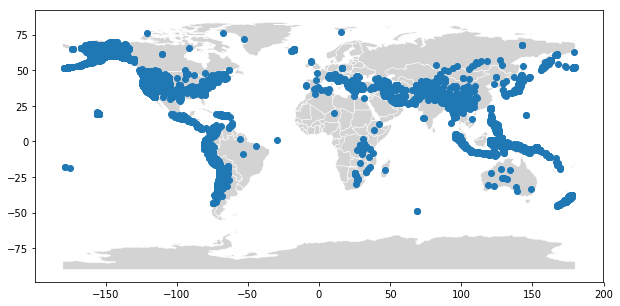

In [133]:
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
countries_earthquakes_ds.plot(ax=ax)

In [134]:
countries_earthquakes_ds['ADMIN'].value_counts()[:10]

United States of America    94520
Canada                       3426
Mexico                        401
Indonesia                     354
Chile                         339
Puerto Rico                   309
Argentina                     262
Iran                          194
China                         187
Papua New Guinea              175
Name: ADMIN, dtype: int64

In [135]:
usa_earthquakes = countries_earthquakes_ds[
    countries_earthquakes_ds['ADMIN'] == 'United States of America']

In [136]:
usa_states_df = gpd.read_file('./statesp010g/statesp010g.shp')

(-197.83881193770523, 198.4511119377053, 14.988654926050065, 74.07495120495008)

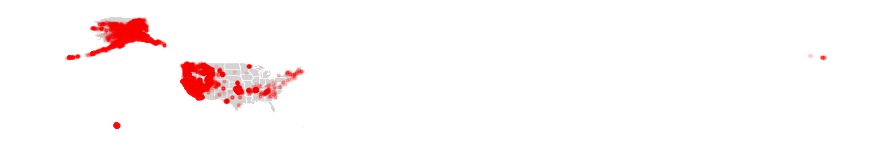

In [137]:
ax = usa_states_df.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
usa_earthquakes.plot(markersize=10, color='red', alpha=0.1, ax=ax)
ax.axis('off')

## So, we can conclude about top of the countries by earthquakes on them

# 2. EDA

In [138]:
from matplotlib import pyplot as plt

## Let's plot correlation matrix

In [139]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

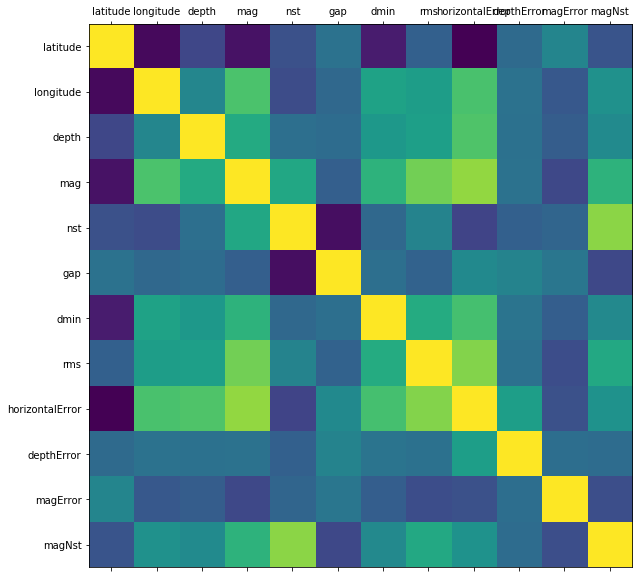

In [140]:
plot_corr(df)

## Now let's get numerical columns

In [141]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = list(set(numerical_cols) - {'latitude', 'longitude'})

df[numerical_cols].dtypes

gap                float64
dmin               float64
magError           float64
magNst             float64
rms                float64
depthError         float64
mag                float64
nst                float64
horizontalError    float64
depth              float64
dtype: object

In [142]:
import seaborn as sns

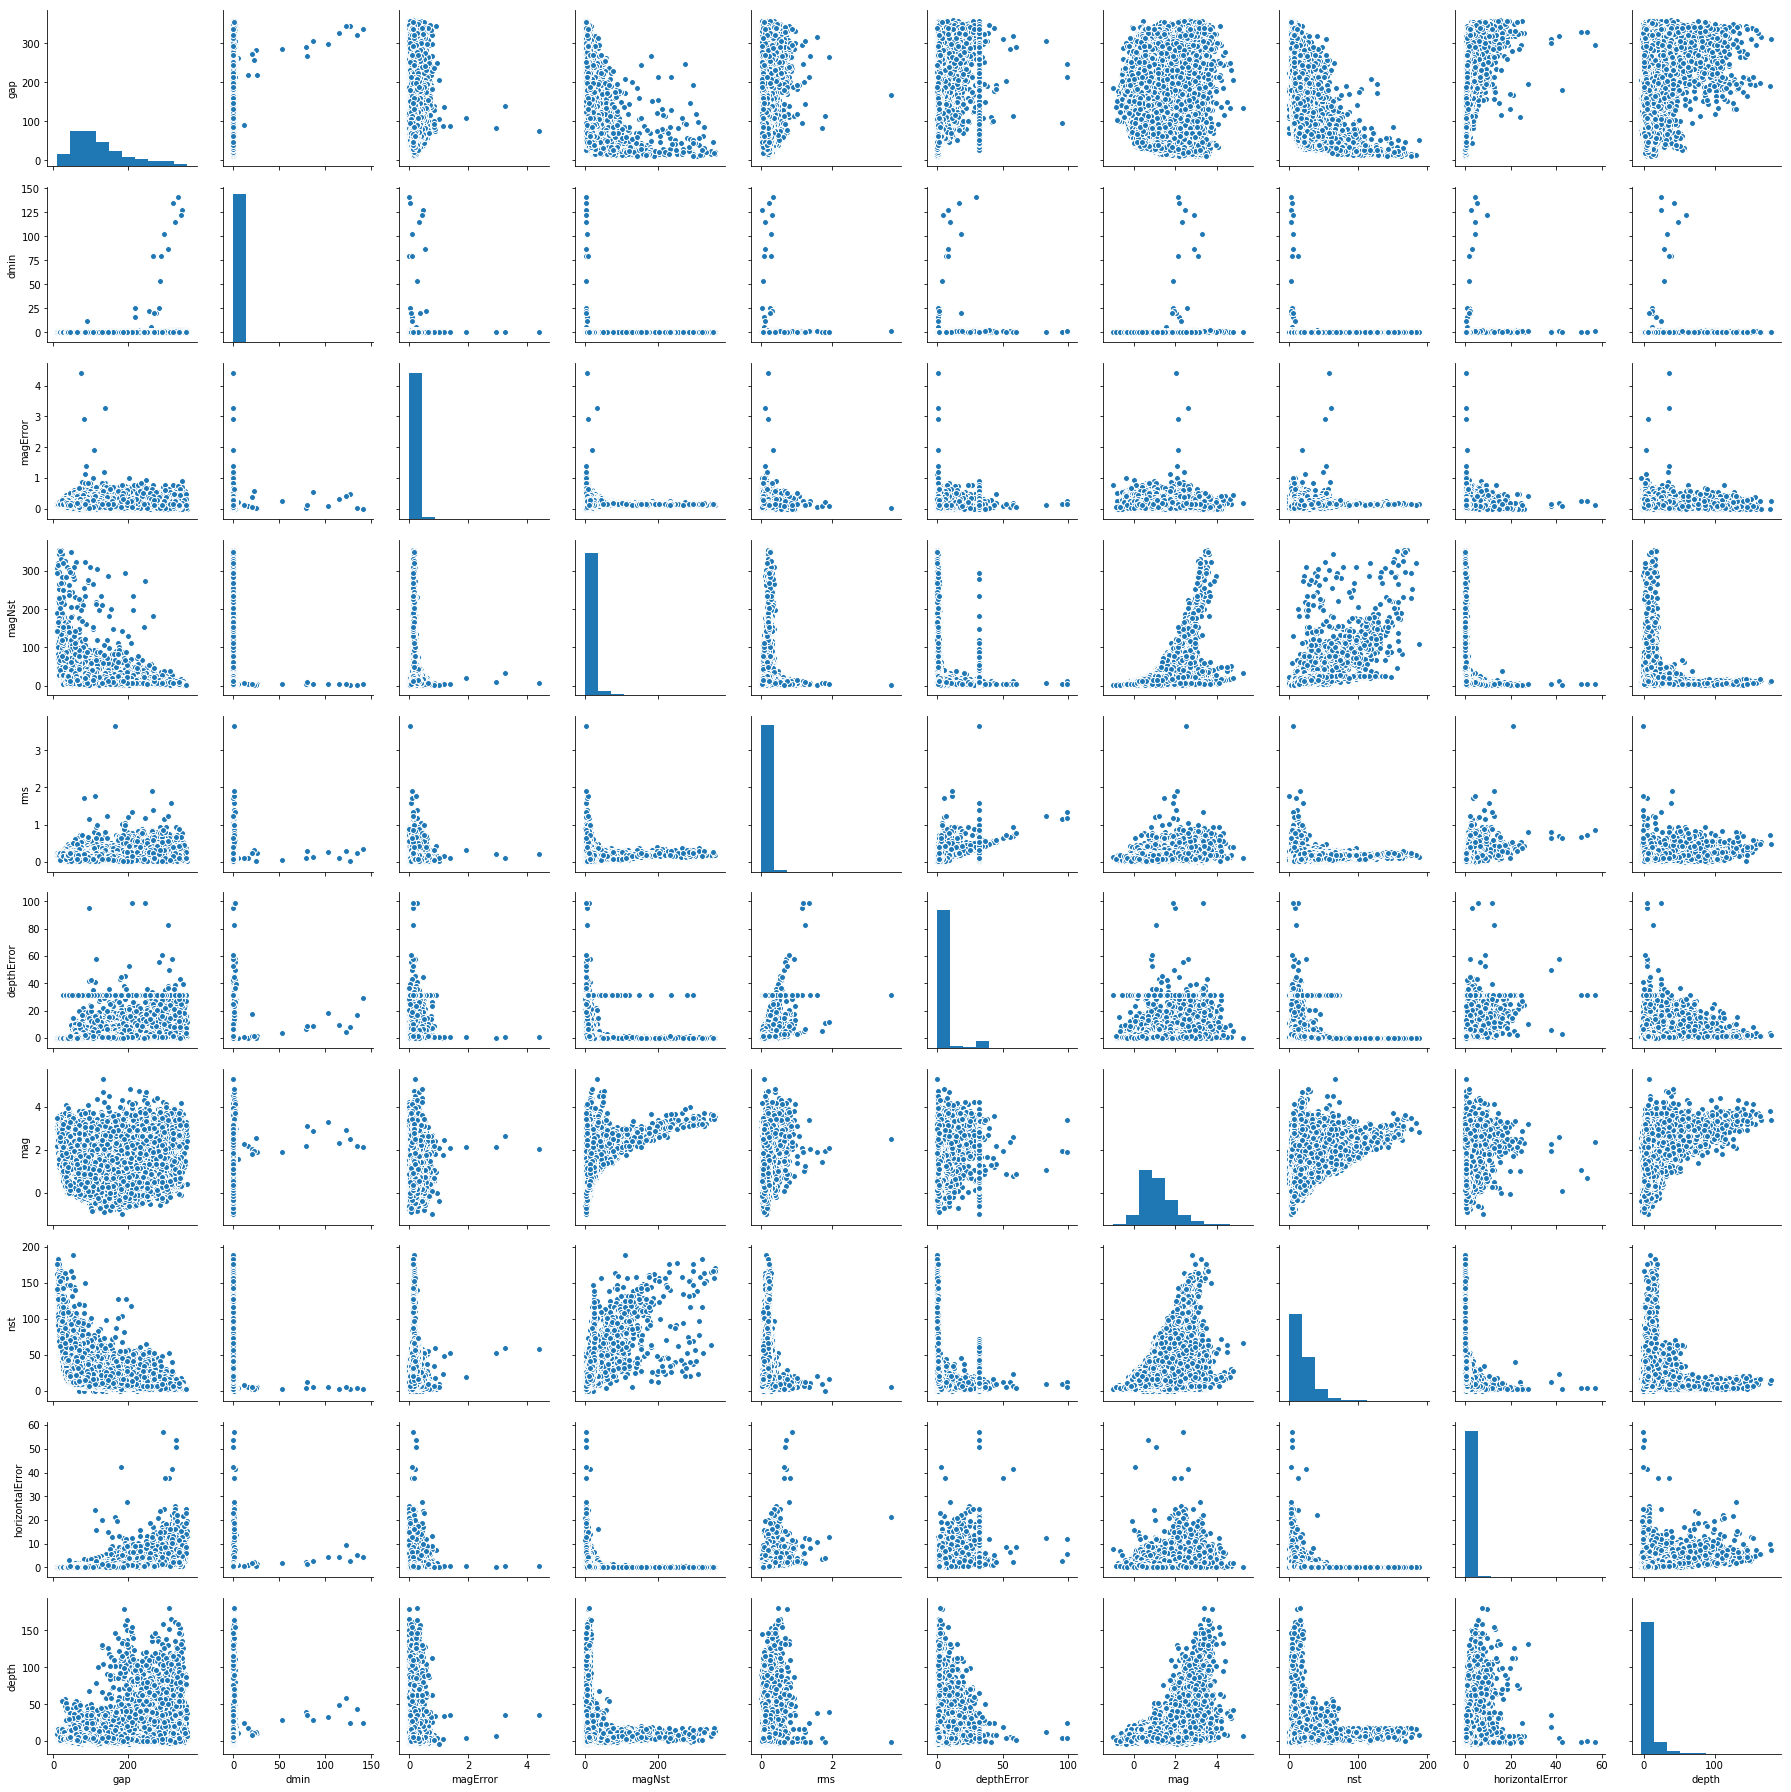

In [143]:
sns.pairplot(df[numerical_cols].dropna(axis=0))

## Let's look closer to mag

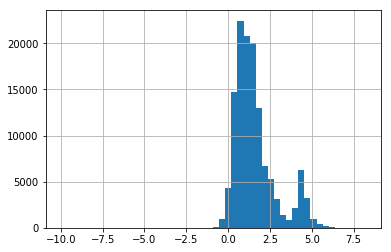

In [144]:
df['mag'].hist(bins=50)

looks like bimodal distribution, shifted to right

Text(0.5,1,'Violin plot')

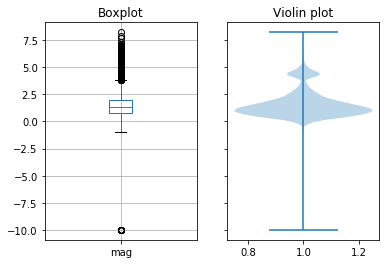

In [145]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
df.boxplot(column='mag', ax=ax1)
ax1.set_title('Boxplot')
ax2.violinplot(df['mag'].dropna(),)
ax2.set_title('Violin plot')

## Let's visualize magnitude by location

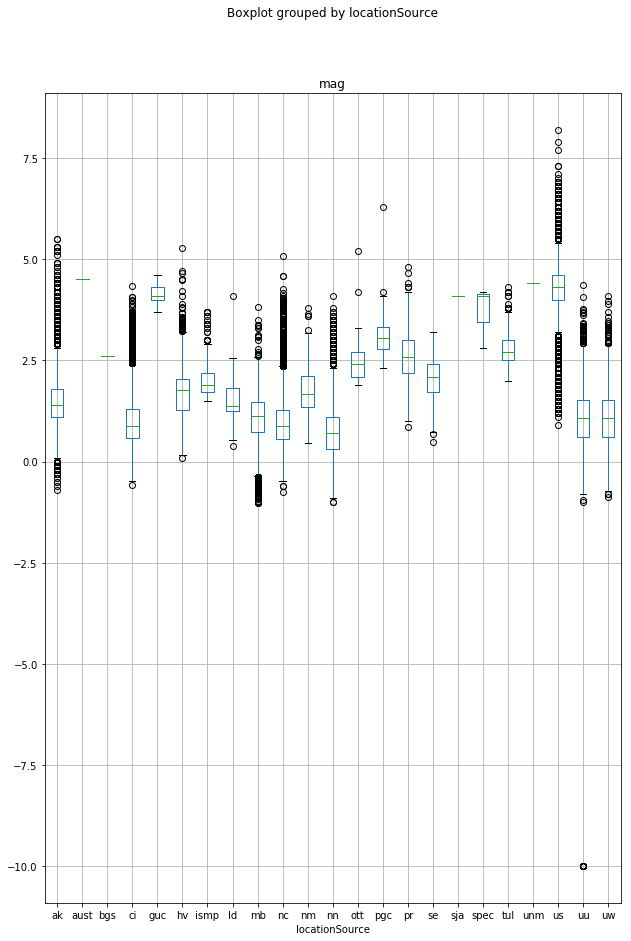

In [146]:
df.boxplot(column='mag', by='locationSource', figsize=(10, 15))

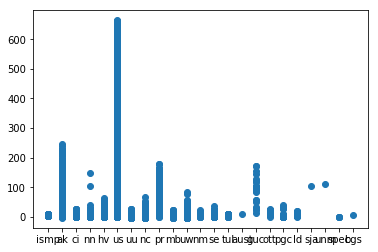

In [147]:
plt.scatter(df['locationSource'], df['depth'])